In [1]:
import os
from fnmatch import fnmatch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,recall_score, classification_report,accuracy_score
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
df= pd.read_csv('adult.csv')

In [3]:
df[df == '?'] = np.nan

In [4]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1})
df = df.dropna()
df=df.drop(columns='fnlwgt')#drops column:fnlwgt
X = df.drop(['income'], axis=1)
y = df['income']
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X[feature] = le.fit_transform(X[feature])
#         X_test[feature] = le.transform(X_test[feature])

In [5]:
def normaliseData(X):
    scaler=preprocessing.StandardScaler().fit(X)
    Xnorm=scaler.transform(X)
    return Xnorm

In [7]:
X.shape

(30162, 13)

In [8]:
X=normaliseData(X)
X

array([[ 3.31662977, -0.20895464,  0.17476277, ..., 10.55581365,
        -1.91416096,  0.26492394],
       [ 1.18483085, -0.20895464, -1.39911971, ...,  9.42791507,
        -0.07773411,  0.26492394],
       [ 0.19506706, -0.20895464,  1.22401776, ...,  9.42791507,
        -0.07773411,  0.26492394],
       ...,
       [ 0.11893139, -0.20895464,  0.17476277, ..., -0.21858598,
        -0.07773411,  0.26492394],
       [ 1.48937355, -0.20895464,  0.17476277, ..., -0.21858598,
        -0.07773411,  0.26492394],
       [-1.25151078, -0.20895464,  0.17476277, ..., -0.21858598,
        -1.74721307,  0.26492394]])

In [9]:
#Task 1 All features considered-KMeans
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=2)
Kmeans.fit(X)
y_kmeans=Kmeans.predict(X)

In [14]:
df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

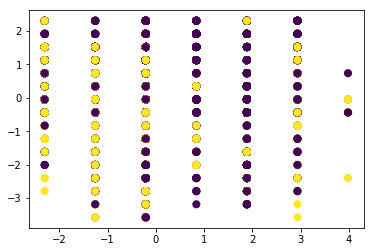

In [15]:
plt.scatter(X[:,1],X[:,3],c=y_kmeans,s=50,cmap='viridis')

In [17]:
from sklearn.metrics import silhouette_score
sum_of_squared_distances=[]
K=range(2,13)
for k in K:
    Kmeans=KMeans(n_clusters=k)
    Kmeans.fit(X)
    sum_of_squared_distances.append(Kmeans.inertia_)
    cluster_labels = Kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.14822279960513773
For n_clusters = 3 The average silhouette_score is : 0.16482398053253536
For n_clusters = 4 The average silhouette_score is : 0.17327545436965242
For n_clusters = 5 The average silhouette_score is : 0.18079214492228868
For n_clusters = 6 The average silhouette_score is : 0.17396042067765438
For n_clusters = 7 The average silhouette_score is : 0.13296546508988236
For n_clusters = 8 The average silhouette_score is : 0.1460062772698345
For n_clusters = 9 The average silhouette_score is : 0.16110863737753392
For n_clusters = 10 The average silhouette_score is : 0.15853464476466975
For n_clusters = 11 The average silhouette_score is : 0.14896649905877682
For n_clusters = 12 The average silhouette_score is : 0.15399635266696218


In [24]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=2)
Kmeans.fit(X)
y_kmeans=Kmeans.predict(X)
labels=Kmeans.labels_
centroids=Kmeans.cluster_centers_
print(labels,centroids)

[1 1 1 ... 1 1 1] [[-0.05907547 -0.58703288 -0.16047384 -0.47826131 -0.11163255 -0.60159867
  -0.00288217 -0.62773793 -0.08595909 -0.26105547 -0.2529822   0.04813186
  -0.59881792  0.07840165 -0.58375062 -0.59734078 -0.21212738  0.185939
  -0.21085279 -0.23435188  0.02335864 -0.41886615]
 [ 0.09986855  0.99239369  0.27128503  0.80851264  0.1887176   1.01701752
   0.00487237  1.06120659  0.14531599  0.44132076  0.4276727  -0.08136811
   1.0123166  -0.13253994  0.98684495  1.00981945  0.35860661 -0.31433451
   0.35645188  0.39617769 -0.03948836  0.70810365]]


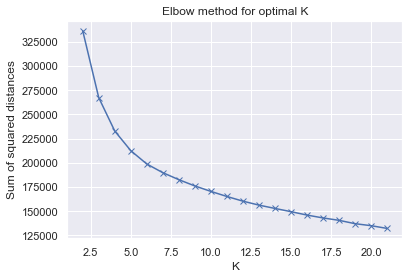

In [25]:
sns.set()
plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

# Expectation Maximization

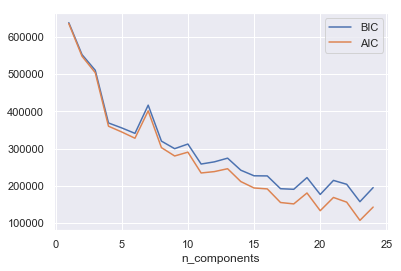

In [29]:
#EM
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 12)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

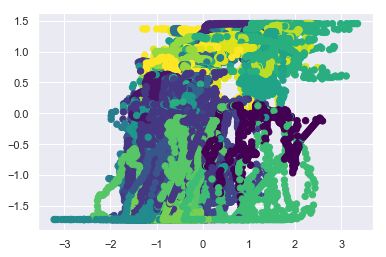

In [28]:
gmm = GaussianMixture(n_components=20).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 5], X[:, 10], c=labels, s=40, cmap='viridis');

In [ ]:
#Number of components obtained for lowest AIC, BIC=20

In [31]:
X

array([[ 3.30126384,  1.84382063, -0.52041138, ...,  1.20769354,
         2.09159642,  0.3669753 ],
       [ 3.30126384,  1.61680671, -0.52041138, ...,  1.07170342,
         1.76658397,  0.34313479],
       [ 3.30126384,  1.51795932, -0.52041138, ...,  0.93571331,
         1.44157151,  0.31929428],
       ...,
       [ 0.78103476,  1.59251371,  2.41110339, ..., -0.15220764,
        -1.10200419,  2.26626907],
       [ 0.78103476,  1.6913611 ,  2.31325594, ..., -0.08421258,
        -1.03134931,  2.25832223],
       [ 0.78103476,  1.5933514 ,  2.24498422, ..., -0.01621752,
        -0.96069443,  2.2503754 ]])

In [36]:
# Task 2 Dimensionality Reduction:
# Feature Selection using Decision Trees
from sklearn.ensemble import ExtraTreesClassifier
#To suppres exponenetial form of decimal values
np.set_printoptions(suppress=True)
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#Selecting top 5 features 
arr=np.sort(model.feature_importances_,axis=None)
feature_index_arr=model.feature_importances_.argsort()[-10:][::-1]
for i in feature_index_arr:
    print(df.columns[i])

[0.06431588 0.03926345 0.05252407 0.03907958 0.04046694 0.0428122
 0.03845486 0.04070283 0.03793259 0.05082224 0.0506681  0.03830293
 0.04538827 0.04805798 0.06468773 0.05042562 0.04389069 0.04506261
 0.06744417 0.03653624 0.02577309 0.03738793]
RH_out
RH_8
lights
T2
RH_5
RH_6
RH_9
T8
RH_7
Press_mm_hg


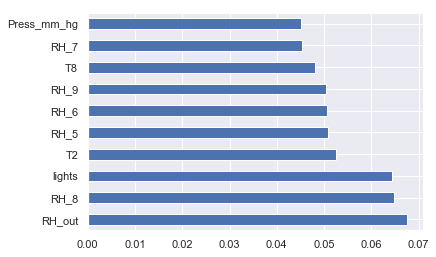

In [38]:
# x=df.iloc[:,0:53]

feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(10).plot(kind='barh')

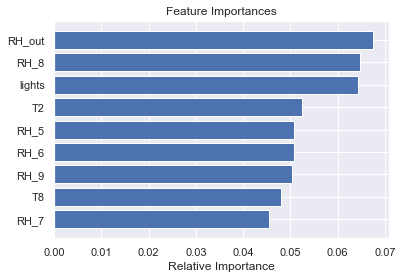

In [39]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [40]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,3.445356,-4.013242
1,3.375929,-4.001217
2,3.290486,-3.984489
3,3.238774,-4.060126
4,3.223482,-4.043965


In [41]:
pca.explained_variance_

array([7.05466452, 6.89636147])

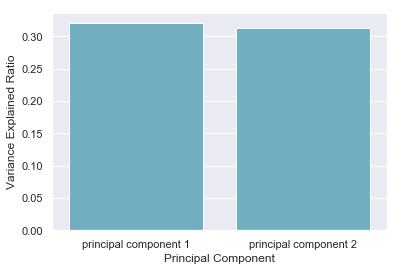

In [42]:
df = pd.DataFrame({'Variance Explained Ratio':pca.explained_variance_ratio_,
             'Principal Component':['principal component 1','principal component 2']})
sns.barplot(x='Principal Component',y="Variance Explained Ratio", 
           data=df, color="c");

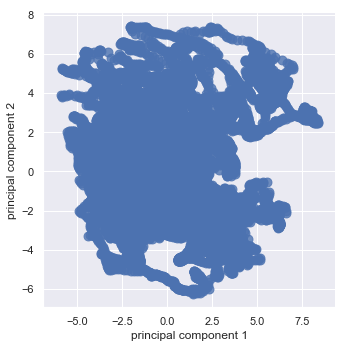

In [43]:
sns.lmplot( x="principal component 1", y="principal component 2",
  data=principalDf, 
  fit_reg=False, 
  legend=True,
  scatter_kws={"s": 80})

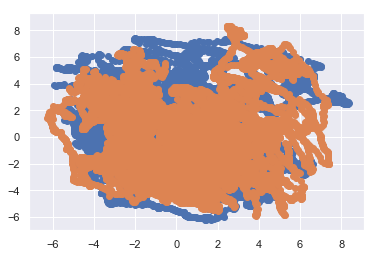

In [44]:
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'])
plt.scatter(principalDf['principal component 2'],principalDf['principal component 1'])

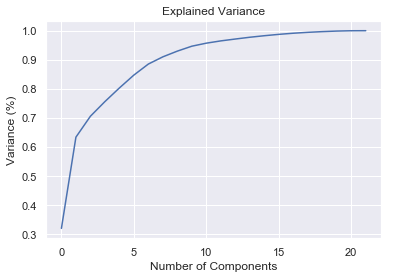

In [45]:
pca_1 = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()


# ICA


In [46]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X_trans=ICA.fit_transform(X)

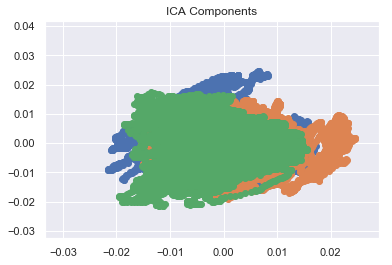

In [47]:
plt.title('ICA Components')
plt.scatter(X_trans[:,0], X_trans[:,1])
plt.scatter(X_trans[:,1], X_trans[:,2])
plt.scatter(X_trans[:,2], X_trans[:,0]) 

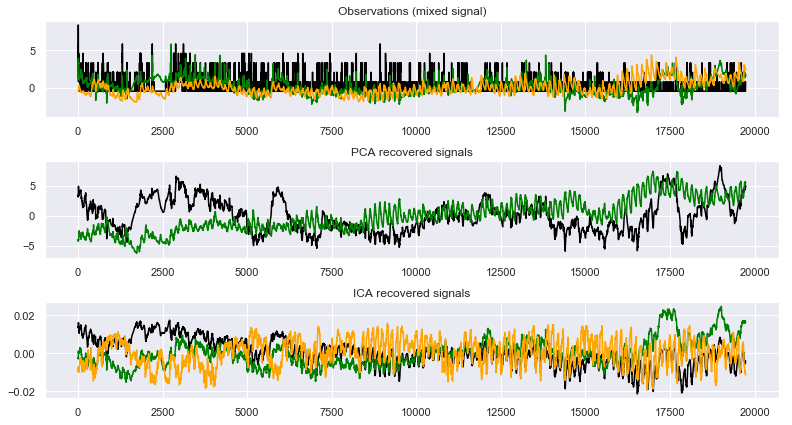

In [48]:
plt.figure(figsize=(12,8))
models = [X,principalComponents, X_trans]
names = ['Observations (mixed signal)',
         'PCA recovered signals',
         'ICA recovered signals']
colors = ['black', 'green', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

# Gaussian Randomised Projections

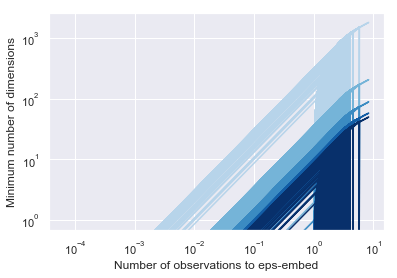

In [49]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
eps_range = np.linspace(0.1, 0.99, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))

plt.figure()
for eps, color in zip(eps_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(X, eps=eps)
    plt.xlabel('Number of observations to eps-embed')
    plt.ylabel('Minimum number of dimensions')
    plt.loglog(X, min_n_components, color=color)

In [50]:
from sklearn import random_projection
transformer=random_projection.GaussianRandomProjection(n_components=26)
X_new=transformer.fit_transform(X)
X_new.shape

(19735, 26)

# Task 3 n=27
#PCA

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents_fit = pca.fit_transform(X)
principalDf_fit = pd.DataFrame(data = principalComponents_fit)
principalDf_fit.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.445356,-4.013242,1.523948,2.501186,0.125897,2.922509,-1.629953,-0.955492,-1.092665,-0.207266,-0.334756,-0.802892,-0.027916,-0.298673,0.116396,-0.516866,0.277167,-0.150875,0.151798,-0.192876
1,3.375929,-4.001217,1.461854,2.530515,-0.014607,2.627772,-1.638863,-1.059326,-1.043090,-0.271117,-0.404326,-0.745872,0.002509,-0.289834,0.040417,-0.465026,0.266613,-0.247380,0.026569,-0.289330
2,3.290486,-3.984489,1.400589,2.558844,-0.164401,2.337837,-1.666000,-1.154333,-1.050790,-0.286782,-0.434640,-0.708168,0.036841,-0.279124,0.006398,-0.453338,0.251858,-0.330445,0.022622,-0.295424
3,3.238774,-4.060126,1.419371,3.570444,-0.005932,2.059365,-2.364421,-1.256957,-1.040777,-0.412621,-0.649694,-0.715863,0.141720,-0.279785,-0.077485,-0.447699,0.249279,-0.359629,0.101565,-0.287914
4,3.223482,-4.043965,1.330275,3.611405,-0.156276,1.768338,-2.395793,-1.342611,-1.064461,-0.382136,-0.644064,-0.698152,0.130166,-0.281819,-0.064518,-0.426897,0.257252,-0.316295,0.171462,-0.269893


In [62]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=2)
Kmeans.fit(principalDf_fit)
y_kmeans_pca=Kmeans.predict(principalDf_fit)

In [58]:
sum_of_squared_distances_pca=[]
K_pca=range(2,15)
for k in K_pca:
    Kmeans_pca=KMeans(n_clusters=k)
    Kmeans_pca.fit(principalDf_fit)
    sum_of_squared_distances_pca.append(Kmeans_pca.inertia_)

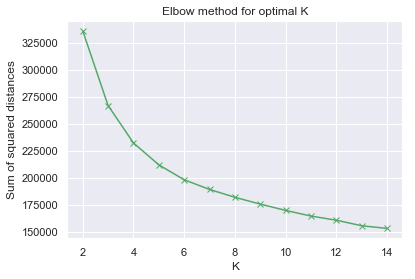

In [56]:
sns.set()
plt.plot(K_pca,sum_of_squared_distances_pca,'gx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K') 
plt.show() 

In [59]:
from sklearn.metrics import silhouette_score
K_pca=range(2,6)
for k in K_pca:
    Kmeans_pca=KMeans(n_clusters=k)
    cluster_labels = Kmeans_pca.fit_predict(principalDf_fit)
    silhouette_avg = silhouette_score(principalDf_fit, cluster_labels)
    print("For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.22480782186111847
For n_clusters = 3 The average silhouette_score is : 0.2320885288311181
For n_clusters = 4 The average silhouette_score is : 0.2104005892936474
For n_clusters = 5 The average silhouette_score is : 0.198375467436986


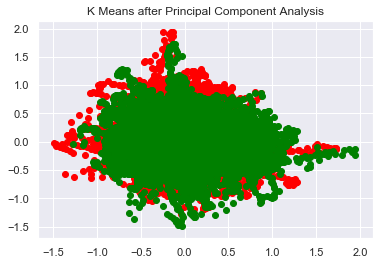

In [60]:
plt.title('K Means after Principal Component Analysis')
plt.scatter(principalDf_fit[15], principalDf_fit[12],color='red')
plt.scatter(principalDf_fit[12], principalDf_fit[15],color='green')

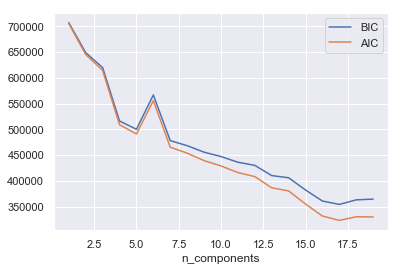

In [64]:
#EM
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(principalDf_fit)
          for n in n_components]

plt.plot(n_components, [m.bic(principalDf_fit) for m in models], label='BIC')
plt.plot(n_components, [m.aic(principalDf_fit) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# ICA ->Kmeans

In [65]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=22, random_state=12) 
X_trans=ICA.fit_transform(principalDf_fit )

In [66]:
sum_of_squared_distances_ica=[]
K_ica=range(2,15)
for k in K_ica:
    Kmeans_ica=KMeans(n_clusters=k)
    Kmeans_ica.fit(X_trans)
    sum_of_squared_distances_ica.append(Kmeans_ica.inertia_)

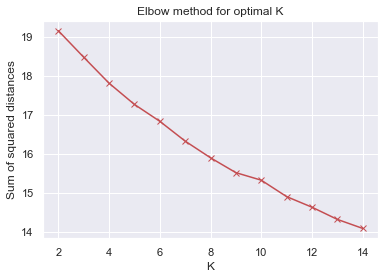

In [67]:
sns.set()
plt.plot(K_ica,sum_of_squared_distances_ica,'rx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances') 
plt.title('Elbow method for optimal K')
plt.show()

In [68]:
from sklearn.metrics import silhouette_score
K_ica=range(2,8)
for k in K_ica:
    Kmeans_ica=KMeans(n_clusters=k)
    cluster_labels = Kmeans_ica.fit_predict(X_trans)
    silhouette_avg = silhouette_score(X_trans, cluster_labels)
    print("For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.05356701219261483
For n_clusters = 3 The average silhouette_score is : 0.05412669095058024
For n_clusters = 4 The average silhouette_score is : 0.05247692698451616
For n_clusters = 5 The average silhouette_score is : 0.04572173622747569
For n_clusters = 6 The average silhouette_score is : 0.05910172334947477
For n_clusters = 7 The average silhouette_score is : 0.056788464850854925


In [ ]:
#for k means after ica clusters 6 are best

# ICA->Expected maximization

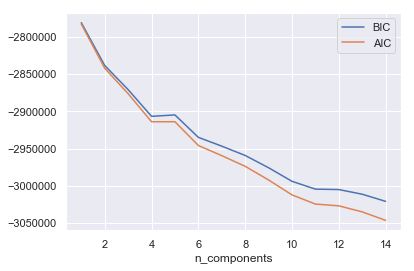

In [69]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_trans)
          for n in n_components]

plt.plot(n_components, [m.bic(X_trans) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_trans) for m in models], label='AIC')
plt.legend(loc='best')  
plt.xlabel('n_components');

# Randomised projections-> Kmeans, EM

In [70]:
transformer=random_projection.GaussianRandomProjection(n_components=20)
X_new=transformer.fit_transform(principalDf_fit)
X_new.shape

(19735, 20)

In [72]:
sum_of_squared_distances_rp=[]
K_rp=range(2,15)
for k in K_rp:
    Kmeans_rp=KMeans(n_clusters=k)
    Kmeans_rp.fit(X_new)
    sum_of_squared_distances_rp.append(Kmeans_rp.inertia_)

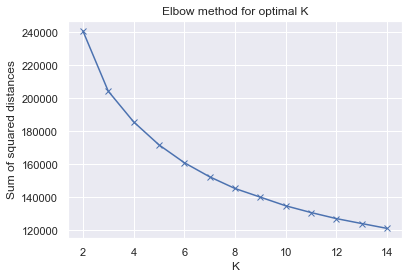

In [73]:
sns.set()
plt.plot(K_rp,sum_of_squared_distances_rp,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [2]:
# from sklearn.metrics import silhouette_score
# K_rp=range(2,8)
# for k in K_rp:
#     Kmeans_rp=KMeans(n_clusters=k)
#     cluster_labels = Kmeans_rp.fit_predict(X_new)
#     silhouette_avg = silhouette_score(X_new, cluster_labels)
#     print("For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)

In [ ]:
#2 Cluster

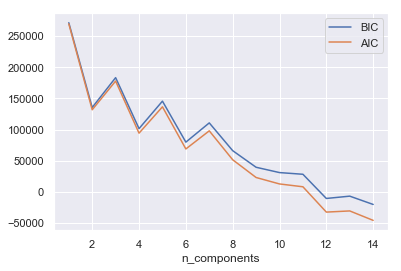

In [75]:
#EM
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_new)
          for n in n_components]

plt.plot(n_components, [m.bic(X_new) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_new) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# Task 4


In [76]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [42]:
df['class'] = pd.cut(df.Comments_Next_Hhours,
                     bins=[-1, 2, 2136],
                     labels=["low", "high"])
df=df.drop('Comments_Next_Hhours',axis=1)
df.head()

,Page_Popularity,Page_Checkins,Page_talking_about,Page_category,Min_E1,Max_E1,Avg_E1,Median_E1,Std_E1,Min_E2,...,Post_Friday,Post_Saturday,Base_Sunday,Base_Monday,Base_Tuesday,Base_Wednesday,Base_Thursday,Base_Friday,Base_Saturday,class
0,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,0,1,0,low
1,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,0,0,1,low
2,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,1,0,1,0,0,0,0,0,0,low
3,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,1,0,1,0,0,0,0,0,0,low
4,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,1,0,0,low


In [101]:
y=df['Appliances_log']
y=y.values

In [111]:
xTrain, xTest, yTrain, yTest = train_test_split(principalDf_fit,y, test_size = 0.3, random_state = 0)

In [112]:
principalDf_fit

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.445356,-4.013242,1.523948,2.501186,0.125897,2.922509,-1.629953,-0.955492,-1.092665,-0.207266,-0.334756,-0.802892,-0.027916,-0.298673,0.116396,-0.516866,0.277167,-0.150875,0.151798,-0.192876
1,3.375929,-4.001217,1.461854,2.530515,-0.014607,2.627772,-1.638863,-1.059326,-1.043090,-0.271117,-0.404326,-0.745872,0.002509,-0.289834,0.040417,-0.465026,0.266613,-0.247380,0.026569,-0.289330
2,3.290486,-3.984489,1.400589,2.558844,-0.164401,2.337837,-1.666000,-1.154333,-1.050790,-0.286782,-0.434640,-0.708168,0.036841,-0.279124,0.006398,-0.453338,0.251858,-0.330445,0.022622,-0.295424
3,3.238774,-4.060126,1.419371,3.570444,-0.005932,2.059365,-2.364421,-1.256957,-1.040777,-0.412621,-0.649694,-0.715863,0.141720,-0.279785,-0.077485,-0.447699,0.249279,-0.359629,0.101565,-0.287914
4,3.223482,-4.043965,1.330275,3.611405,-0.156276,1.768338,-2.395793,-1.342611,-1.064461,-0.382136,-0.644064,-0.698152,0.130166,-0.281819,-0.064518,-0.426897,0.257252,-0.316295,0.171462,-0.269893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,4.809580,5.573425,0.844551,-0.575818,0.275396,-1.460132,0.166062,-0.519978,-0.323277,-0.170930,-0.442487,0.003884,0.117944,0.318965,-0.226018,-0.170036,-0.224036,0.512529,0.055062,-0.130028
19731,4.781783,5.543584,0.846797,-0.580686,0.280260,-1.380905,0.155832,-0.444747,-0.307876,-0.143574,-0.441484,0.003111,0.082850,0.281450,-0.241443,-0.166475,-0.210757,0.464263,0.053907,-0.136720
19732,4.904570,5.394841,0.906433,0.387023,0.589453,-1.292014,-0.552830,-0.345822,-0.316812,-0.142928,-0.636300,-0.004615,0.120117,0.285750,-0.298828,-0.183221,-0.211959,0.361697,0.095414,-0.135747
19733,4.882866,5.312124,0.899742,0.367379,0.582397,-1.210589,-0.589511,-0.223883,-0.375961,-0.135434,-0.637620,-0.031081,0.075551,0.266073,-0.279730,-0.214268,-0.127151,0.462351,0.079817,-0.131928


In [45]:
#yTrain=to_categorical(yTrain,num_classes=2)
#yTest=to_categorical(yTest,num_classes=2)

In [80]:
def plot_confusion_matrix(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
    plt.title(all_sample_title, size = 15);
    print(classification_report(yTest,y_pred))
    plt.show()

def plot_model_accuracy():
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
    plt.show()

def plot_model_loss():   
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='upper right')
    plt.show()

In [87]:
xTrain.shape

(13814, 20)

In [110]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [1]:
#PCA
# model=Sequential()
# model.add(Dense(15,input_dim=20,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(15,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(15,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(15,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1,activation='softmax'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# history=model.fit(xTrain,yTrain,validation_split=0.33,epochs=20,batch_size=32)
# plot_model_accuracy()
# plot_model_loss()


              precision    recall  f1-score   support

           0       0.91      0.96      0.94     35978
           1       0.86      0.74      0.80     12445

   micro avg       0.90      0.90      0.90     48423
   macro avg       0.89      0.85      0.87     48423
weighted avg       0.90      0.90      0.90     48423



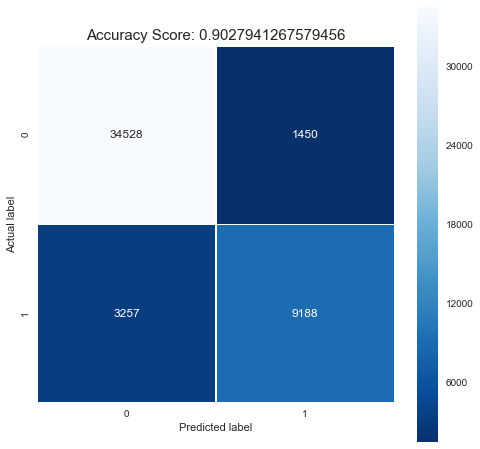

In [64]:
y_pred=model.predict(xTest)
y_pred=np.argmax(y_pred,axis=1)
plot_confusion_matrix(yTest,y_pred)

In [63]:
y_pred

array([[9.39284265e-01, 6.07156642e-02],
       [8.81759346e-01, 1.18240625e-01],
       [1.80113682e-04, 9.99819934e-01],
       ...,
       [6.06776886e-02, 9.39322233e-01],
       [8.81392300e-01, 1.18607715e-01],
       [9.96980488e-01, 3.01945908e-03]], dtype=float32)

In [78]:
xTrain, xTest, yTrain, yTest = train_test_split(principalDf_fit,encoded_labels, test_size = 0.3, random_state = 0)

In [85]:
yTrain=to_categorical(yTrain,num_classes=2)
yTest=to_categorical(yTest,num_classes=2)

In [86]:
import time
def evaluate_time_model(xTrain,yTrain,xTest,yTest):

    #nb_epoch = 1
    #batch_size = 500
    start = time.time()
    model=Sequential()
    model.add(Dense(20,input_dim=26,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    history=model.fit(xTrain,yTrain,validation_split=0.33,epochs=20,batch_size=32)
    end = time.time()
    print('Avg. Build Time:', (end - start) / 100.0)
    return (end - start) / 100.0

In [84]:
yTrain.shape

(112987,)

In [89]:
evaluate_time_model(xTrain,yTrain,xTest,yTest)

Train on 75701 samples, validate on 37286 samples
Epoch 1/20
75701/75701 [==============================] - 5s 65us/step - loss: 0.3525 - acc: 0.8496 - val_loss: 0.2738 - val_acc: 0.8907
Epoch 2/20
75701/75701 [==============================] - 6s 73us/step - loss: 0.2899 - acc: 0.8833 - val_loss: 0.2572 - val_acc: 0.8956
Epoch 3/20
75701/75701 [==============================] - 5s 63us/step - loss: 0.2776 - acc: 0.8888 - val_loss: 0.2525 - val_acc: 0.8968
Epoch 4/20
75701/75701 [==============================] - 4s 57us/step - loss: 0.2710 - acc: 0.8916 - val_loss: 0.2502 - val_acc: 0.8963
Epoch 5/20
75701/75701 [==============================] - 5s 66us/step - loss: 0.2671 - acc: 0.8920 - val_loss: 0.2519 - val_acc: 0.8986
Epoch 6/20
75701/75701 [==============================] - 5s 60us/step - loss: 0.2648 - acc: 0.8938 - val_loss: 0.2428 - val_acc: 0.8995
Epoch 7/20
75701/75701 [==============================] - 6s 77us/step - loss: 0.2627 - acc: 0.8935 - val_loss: 0.2436 - val_acc

0.9156652784347534

In [88]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [ ]:
#Feature Selection

In [188]:
xTrain, xTest, yTrain, yTest = train_test_split(df.iloc[:,0:53],encoded_labels, test_size = 0.3, random_state = 0)

In [189]:
colsSelected=['Base_Time','CC2','CC5','Post_share_count','CC1','Post_length','CC4','CC3','Avg_E4','Min_E5']
xTest,xTrain=xTest[colsSelected],xTrain[colsSelected]

In [190]:
yTrain=to_categorical(yTrain,num_classes=2)
yTest=to_categorical(yTest,num_classes=2)

In [191]:
start = time.time()
model=Sequential()
model.add(Dense(20,input_dim=10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xTrain,yTrain,validation_split=0.33,epochs=20,batch_size=32)
end = time.time()
print('Avg. Build Time:', (end - start) / 100.0)

Train on 75701 samples, validate on 37286 samples
Epoch 1/20
75701/75701 [==============================] - 10s 129us/step - loss: 0.7448 - acc: 0.7761 - val_loss: 0.3249 - val_acc: 0.8291
Epoch 2/20
75701/75701 [==============================] - 7s 97us/step - loss: 0.3409 - acc: 0.8548 - val_loss: 0.2699 - val_acc: 0.8923
Epoch 3/20
75701/75701 [==============================] - 7s 93us/step - loss: 0.2939 - acc: 0.8773 - val_loss: 0.2584 - val_acc: 0.8951
Epoch 4/20
75701/75701 [==============================] - 7s 87us/step - loss: 0.2808 - acc: 0.8861 - val_loss: 0.2602 - val_acc: 0.8977
Epoch 5/20
75701/75701 [==============================] - 6s 84us/step - loss: 0.2733 - acc: 0.8889 - val_loss: 0.2527 - val_acc: 0.9001
Epoch 6/20
75701/75701 [==============================] - 7s 90us/step - loss: 0.2695 - acc: 0.8909 - val_loss: 0.2411 - val_acc: 0.9012
Epoch 7/20
75701/75701 [==============================] - 6s 80us/step - loss: 0.2653 - acc: 0.8919 - val_loss: 0.2452 - val_a

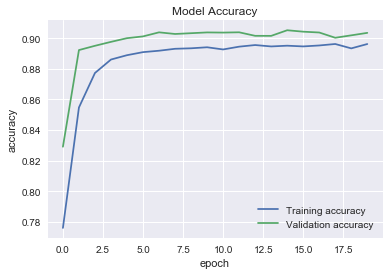

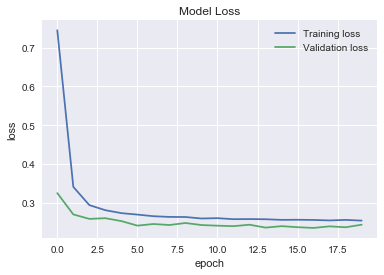

In [192]:
plot_model_accuracy()
plot_model_loss()

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     35978
           1       0.83      0.78      0.80     12445

   micro avg       0.90      0.90      0.90     48423
   macro avg       0.88      0.86      0.87     48423
weighted avg       0.90      0.90      0.90     48423



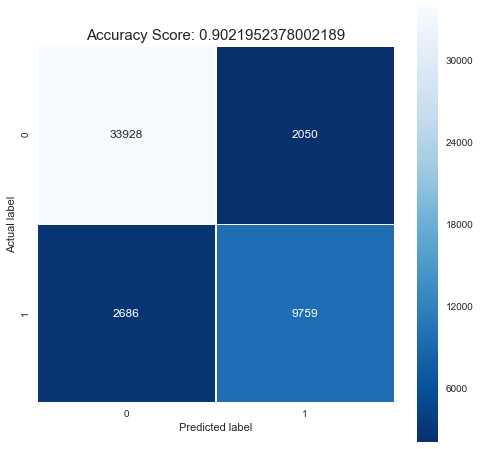

In [111]:
y_pred=model.predict(xTest)
y_pred=np.argmax(y_pred,axis=1)
plot_confusion_matrix(yTest,y_pred)

In [113]:
X_trans.shape

(161410, 26)

In [139]:
#ICA
xTrain, xTest, yTrain, yTest = train_test_split(X_trans,encoded_labels, test_size = 0.3, random_state = 0)

In [125]:
yTrain=to_categorical(yTrain,num_classes=2)
yTest=to_categorical(yTest,num_classes=2)

In [126]:
start = time.time()
model=Sequential()
model.add(Dense(20,input_dim=26,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xTrain,yTrain,validation_split=0.33,epochs=20,batch_size=32)
end = time.time()
print('Avg. Build Time:', (end - start) / 100.0)

Train on 75701 samples, validate on 37286 samples
Epoch 1/20
75701/75701 [==============================] - 6s 75us/step - loss: 0.4132 - acc: 0.8209 - val_loss: 0.2908 - val_acc: 0.8837
Epoch 2/20
75701/75701 [==============================] - 4s 59us/step - loss: 0.3238 - acc: 0.8699 - val_loss: 0.2758 - val_acc: 0.8894
Epoch 3/20
75701/75701 [==============================] - 4s 58us/step - loss: 0.3082 - acc: 0.8756 - val_loss: 0.2628 - val_acc: 0.8954
Epoch 4/20
75701/75701 [==============================] - 4s 58us/step - loss: 0.2997 - acc: 0.8770 - val_loss: 0.2627 - val_acc: 0.8943
Epoch 5/20
75701/75701 [==============================] - 4s 58us/step - loss: 0.2961 - acc: 0.8784 - val_loss: 0.2604 - val_acc: 0.8899
Epoch 6/20
75701/75701 [==============================] - 4s 59us/step - loss: 0.2915 - acc: 0.8806 - val_loss: 0.2686 - val_acc: 0.8821
Epoch 7/20
75701/75701 [==============================] - 4s 59us/step - loss: 0.2885 - acc: 0.8824 - val_loss: 0.2635 - val_acc

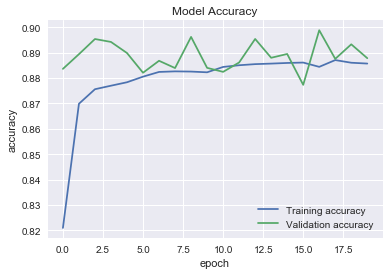

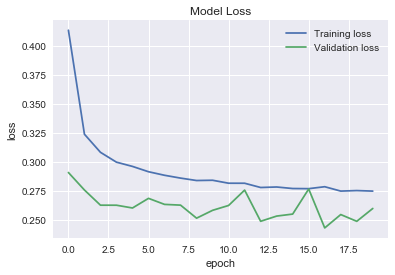

In [127]:
plot_model_accuracy()
plot_model_loss()

In [130]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     35978
           1       0.88      0.66      0.76     12445

   micro avg       0.89      0.89      0.89     48423
   macro avg       0.88      0.82      0.84     48423
weighted avg       0.89      0.89      0.88     48423



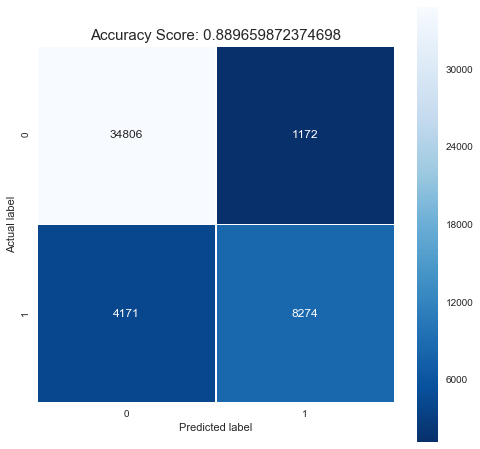

In [132]:
y_pred=model.predict(xTest)
y_pred=np.argmax(y_pred,axis=1)
plot_confusion_matrix(yTest,y_pred)

In [133]:
#RP
from sklearn import random_projection
transformer=random_projection.GaussianRandomProjection(n_components=26)
X_new=transformer.fit_transform(X)
X_new.shape

(161410, 26)

In [134]:
xTrain, xTest, yTrain, yTest = train_test_split(X_new,encoded_labels, test_size = 0.3, random_state = 0)

In [135]:
yTrain=to_categorical(yTrain,num_classes=2)
yTest=to_categorical(yTest,num_classes=2)

Train on 75701 samples, validate on 37286 samples
Epoch 1/20
75701/75701 [==============================] - 6s 74us/step - loss: 0.3668 - acc: 0.8430 - val_loss: 0.2872 - val_acc: 0.8867
Epoch 2/20
75701/75701 [==============================] - 4s 59us/step - loss: 0.3014 - acc: 0.8798 - val_loss: 0.2645 - val_acc: 0.8945
Epoch 3/20
75701/75701 [==============================] - 4s 59us/step - loss: 0.2896 - acc: 0.8857 - val_loss: 0.2641 - val_acc: 0.8938
Epoch 4/20
75701/75701 [==============================] - 4s 59us/step - loss: 0.2826 - acc: 0.8860 - val_loss: 0.2578 - val_acc: 0.8968
Epoch 5/20
75701/75701 [==============================] - 5s 65us/step - loss: 0.2765 - acc: 0.8886 - val_loss: 0.2600 - val_acc: 0.8971
Epoch 6/20
75701/75701 [==============================] - 5s 62us/step - loss: 0.2755 - acc: 0.8898 - val_loss: 0.2612 - val_acc: 0.8956
Epoch 7/20
75701/75701 [==============================] - 4s 59us/step - loss: 0.2726 - acc: 0.8902 - val_loss: 0.2551 - val_acc

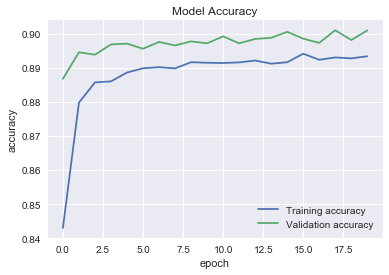

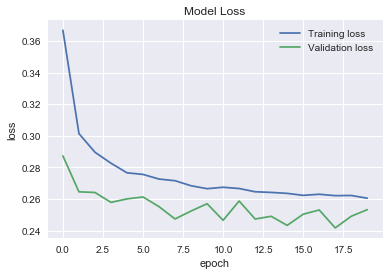

array([0, 0, 1, ..., 1, 0, 0])

In [136]:
start = time.time()
model=Sequential()
model.add(Dense(20,input_dim=26,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xTrain,yTrain,validation_split=0.33,epochs=20,batch_size=32)
end = time.time()
print('Avg. Build Time:', (end - start) / 100.0)

plot_model_accuracy()
plot_model_loss()

y_pred


              precision    recall  f1-score   support

           0       0.74      1.00      0.85     35978
           1       1.00      0.00      0.00     12445

   micro avg       0.74      0.74      0.74     48423
   macro avg       0.87      0.50      0.43     48423
weighted avg       0.81      0.74      0.63     48423



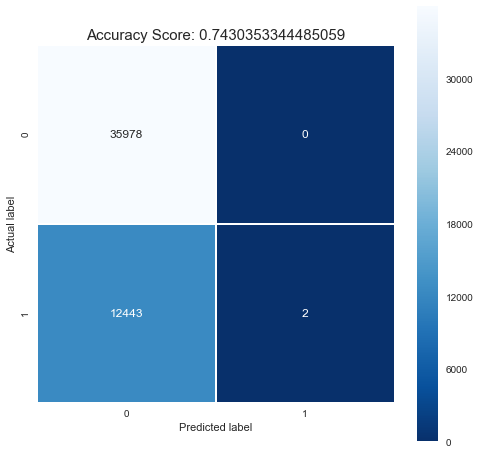

In [140]:

y_pred=model.predict(xTest)
y_pred=np.argmax(y_pred,axis=1)
plot_confusion_matrix(yTest,y_pred)


In [143]:
#Plot clock tiime together for all 3 


In [144]:
#Task 5
#Taking cluster labels from task1 and using as input features
X=df.iloc[:,0:53]
normaliseData(X)
Kmeans=KMeans(n_clusters=2)
Kmeans.fit(X)
cluster_labels = Kmeans.fit_predict(X)

In [151]:
xTrain, xTest, yTrain, yTest = train_test_split(cluster_labels,encoded_labels, test_size = 0.3, random_state = 0)

In [149]:
yTrain=to_categorical(yTrain,num_classes=2)
yTest=to_categorical(yTest,num_classes=2)

Train on 75701 samples, validate on 37286 samples
Epoch 1/20
75701/75701 [==============================] - 6s 79us/step - loss: 0.5739 - acc: 0.7432 - val_loss: 0.5688 - val_acc: 0.7444
Epoch 2/20
75701/75701 [==============================] - 5s 71us/step - loss: 0.5705 - acc: 0.7433 - val_loss: 0.5694 - val_acc: 0.7444
Epoch 3/20
75701/75701 [==============================] - 5s 66us/step - loss: 0.5703 - acc: 0.7433 - val_loss: 0.5685 - val_acc: 0.7444
Epoch 4/20
75701/75701 [==============================] - 5s 64us/step - loss: 0.5699 - acc: 0.7433 - val_loss: 0.5685 - val_acc: 0.7444
Epoch 5/20
75701/75701 [==============================] - 5s 62us/step - loss: 0.5699 - acc: 0.7433 - val_loss: 0.5684 - val_acc: 0.7444
Epoch 6/20
75701/75701 [==============================] - 5s 66us/step - loss: 0.5698 - acc: 0.7433 - val_loss: 0.5689 - val_acc: 0.7444
Epoch 7/20
75701/75701 [==============================] - 5s 68us/step - loss: 0.5698 - acc: 0.7433 - val_loss: 0.5684 - val_acc

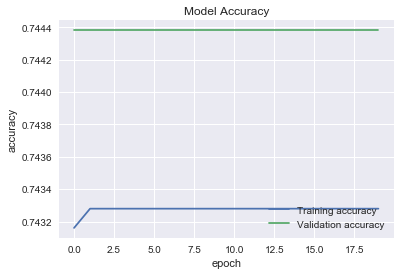

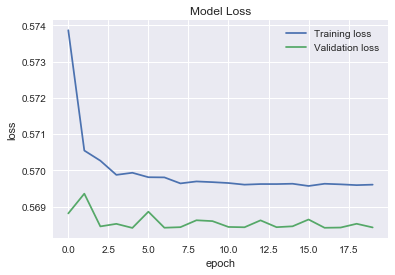

In [150]:

start = time.time()
model=Sequential()
model.add(Dense(20,input_dim=1,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xTrain,yTrain,validation_split=0.33,epochs=20,batch_size=32)
end = time.time()
print('Avg. Build Time:', (end - start) / 100.0)

plot_model_accuracy()
plot_model_loss()

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     35978
           1       0.00      0.00      0.00     12445

   micro avg       0.74      0.74      0.74     48423
   macro avg       0.37      0.50      0.43     48423
weighted avg       0.55      0.74      0.63     48423



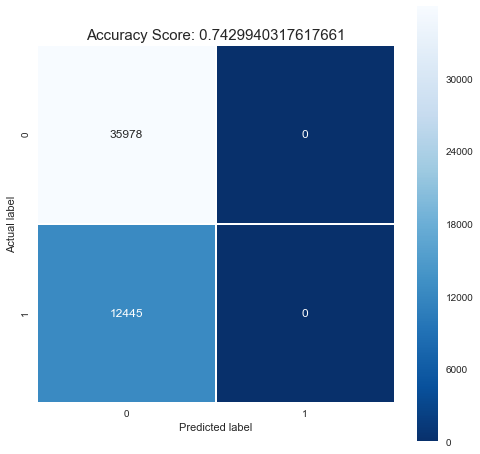

In [152]:
y_pred=model.predict(xTest)
y_pred=np.argmax(y_pred,axis=1)
plot_confusion_matrix(yTest,y_pred)

Text(0.95,0.05,'K-means')

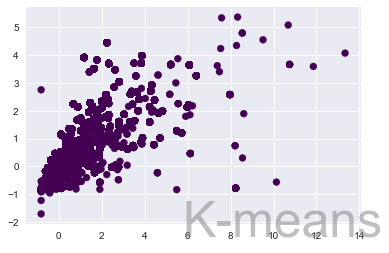

In [159]:
fig, ax = plt.subplots()
plt.scatter(X[:,23], X[:,25], c=cluster_labels, cmap='viridis')
fig.text(0.95, 0.05, 'K-means',
            fontsize=50, color='gray',
            ha='right', va='bottom', alpha=0.5)

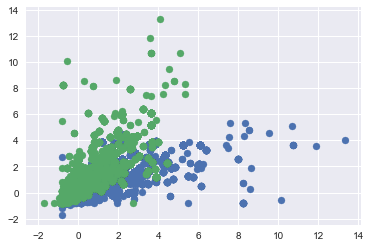

In [162]:
plt.title('')
plt.scatter(X[:,23], X[:,25])
plt.scatter(X[:,25], X[:,23])